In [31]:
import tensorflow as tf
import keras
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image
from generate_masks import pad_mask, crop_square
from test_human import remove_ticks
import os
import time

In [10]:
unet = load_model('./models/unet_model.h5')
savepath = './tiles/predictions/'
source_path = './tiles/keras_folders/'

In [34]:
def make_prediction(id_no, train=False, model=unet, path=source_path, save_result=False, save_path=savepath):
    """generates prediction on image id_no and 
    returns the prediction as a numpy array.
    """
    #Find file
    if train:
        path += 'train/'
    else:
        path += 'test/'
    filename = path + '{}.png'.format(id_no)
    #Open image, convert to np array, scale pixel values
    x_array = np.array(Image.open(filename))/255
    # Build input tensor with correct shape: (1, 256, 256, 1)
    x = np.expand_dims(x_array, axis=-1)
    input_tensor = np.array([x])
    # Get prediction
    prediction = model.predict(input_tensor)
    # Convert prediction tensor to raster image
    prediction = prediction[0, :, :, 0]
    #Save result if desired
    if save_result:
        np.save(save_path + '{}.png'.format(id_no), prediction)
    return prediction

def inspect_prediction(prediction, id_no, train=False):
    """Displays an input prediction against its source image and
    ground truth target image.
    """
    if not train:
        base_path = './tiles/keras_folders/test'
    elif train:
        base_path = './tiles/keras_folders/train'
    source_image = crop_square(Image.open(base_path+'/{}.png'.format(id_no)), 172, orgn=(42, 42))
    ground_truth = Image.open(base_path+'_mask/{}_mask.png'.format(id_no))
    fig, ax = plt.subplots(ncols=3, figsize=(8, 4))
    fig.suptitle('Results for Tile {}'.format(id_no))
    ax = [remove_ticks(x) for x in ax]
    ax[0].imshow(np.array(source_image), cmap='Greys');
    ax[0].set_title('Input image');
    ax[1].imshow(np.array(ground_truth), cmap='CMRmap');
    ax[1].set_title('"Ground Truth"');
    ax[2].imshow(prediction, cmap='CMRmap');
    ax[2].set_title('Model Prediction');
    plt.tight_layout()
    plt.show()
    return

def inspect_prediction_from_disc(id_no):
    """Displays a previously-saved prediction for inspection
    by loading it from hard drive.
    """
    base_path = './tiles/keras_folders/test'
    prediction = np.load('./tiles/predictions/{}.npy'.format(id_no))
    source_image = crop_square(Image.open(base_path+'/{}.png'.format(id_no)), 172, orgn=(42, 42))
    ground_truth = Image.open(base_path+'_mask/{}_mask.png'.format(id_no))
    fig, ax = plt.subplots(ncols=3, figsize=(8, 4))
    fig.suptitle('Results for Tile {}'.format(id_no))
    ax = [remove_ticks(x) for x in ax]
    ax[0].imshow(np.array(source_image), cmap='Greys');
    ax[0].set_title('Input image');
    ax[1].imshow(np.array(ground_truth), cmap='CMRmap');
    ax[1].set_title('"Ground Truth"');
    ax[2].imshow(prediction, cmap='CMRmap');
    ax[2].set_title('Model Prediction');
    plt.tight_layout()
    plt.show()
    return

prediction made in 2.469127655029297 seconds


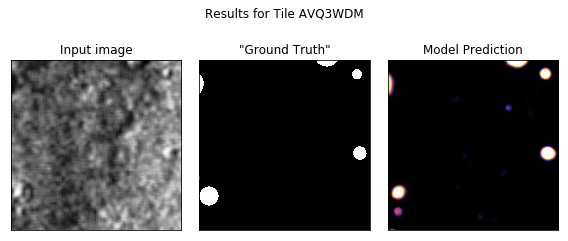

In [35]:
test_files = os.listdir(source_path+'test/')
id_no = test_files[0][:-4]
t1 = time.time()
pred1 = make_prediction(id_no)
print('prediction made in {} seconds'.format(time.time()-t1))
inspect_prediction(pred1, id_no)

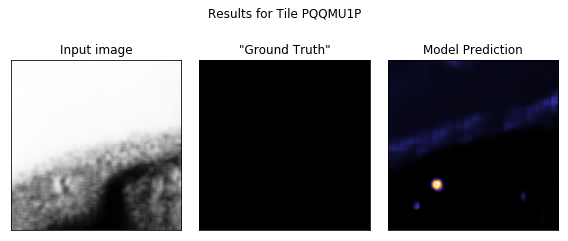

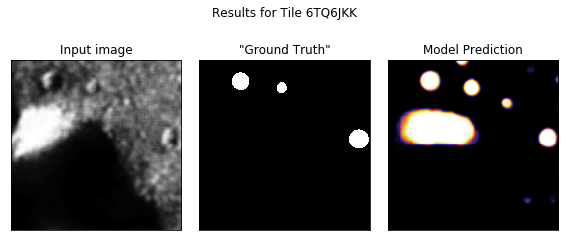

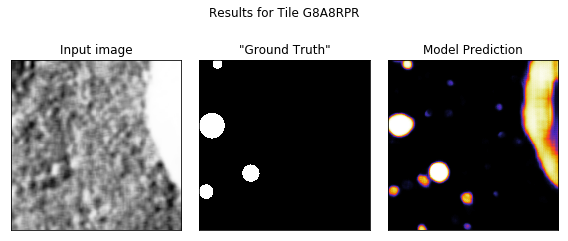

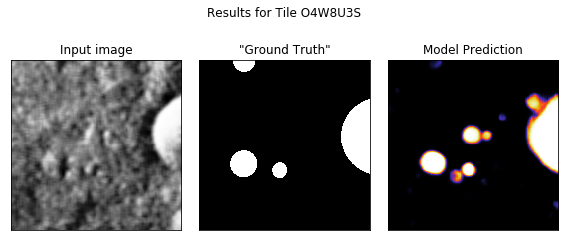

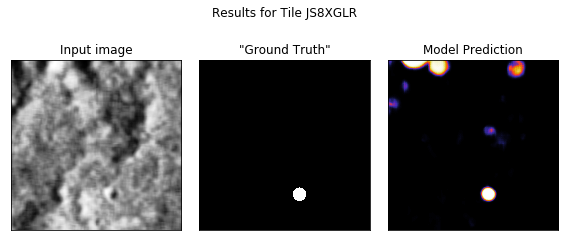

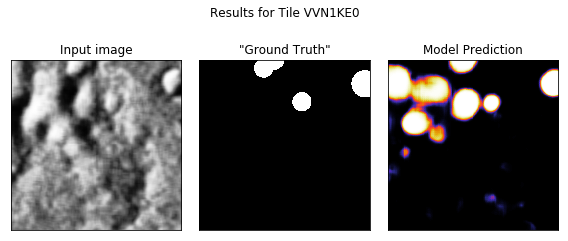

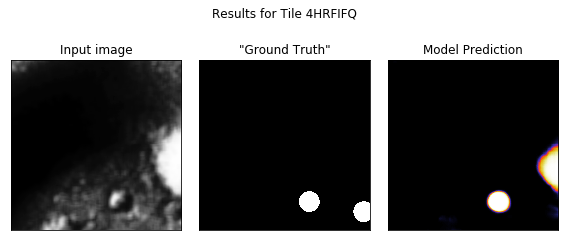

In [3]:
path = './tiles/predictions/'
files = os.listdir(path)
for file in files[:7]:
    inspect_prediction_from_disc(file[:-4])

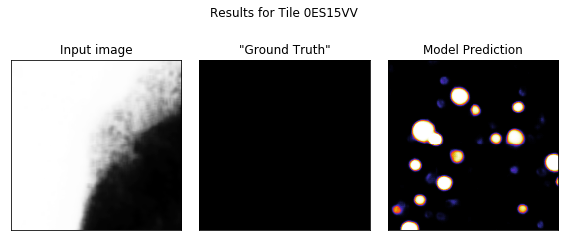

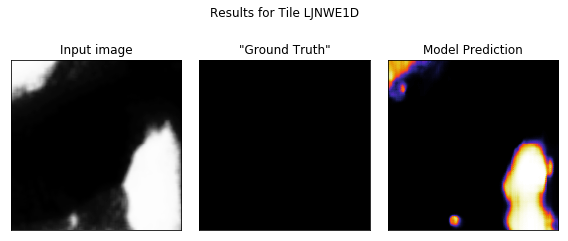

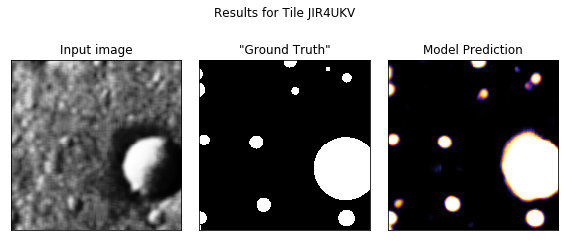

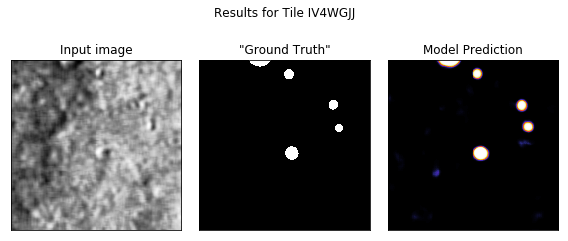

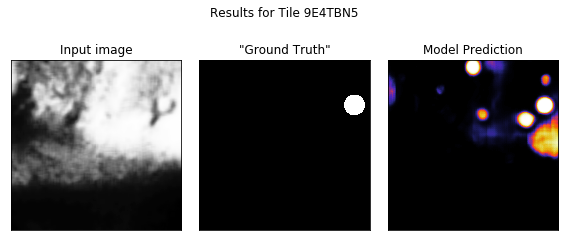

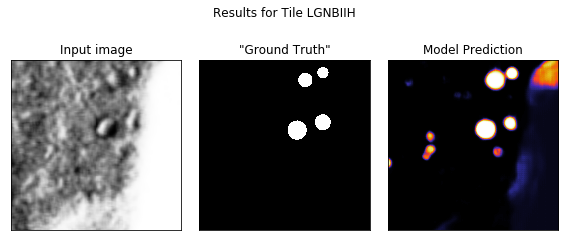

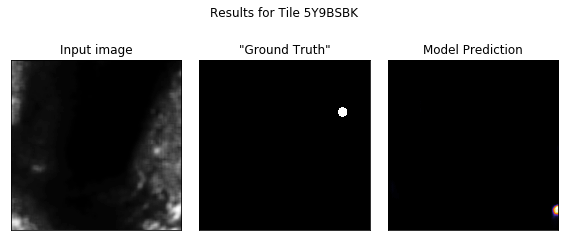

In [4]:
for file in files[7:14]:
    inspect_prediction_from_disc(file[:-4])

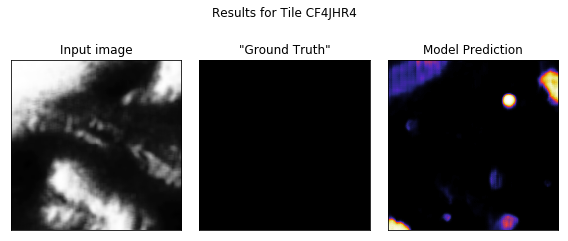

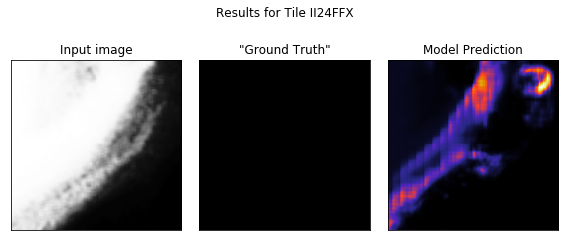

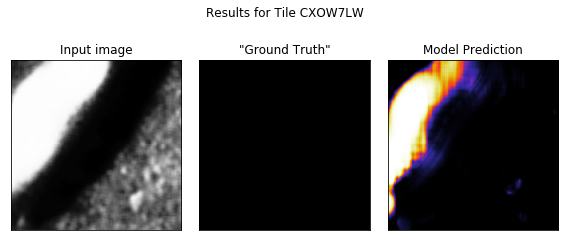

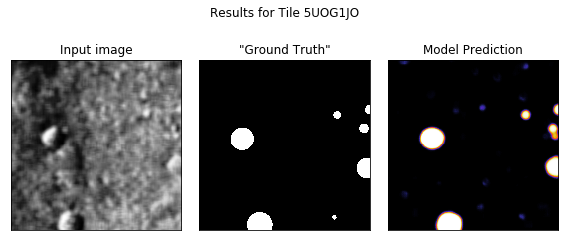

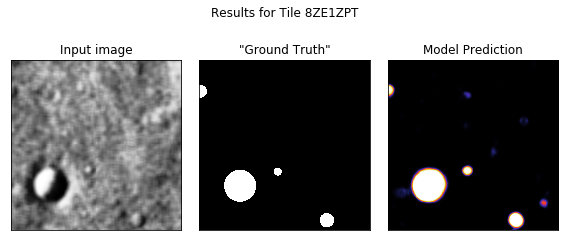

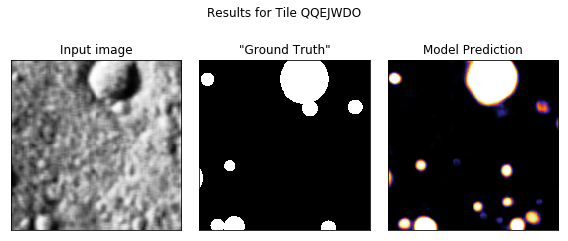

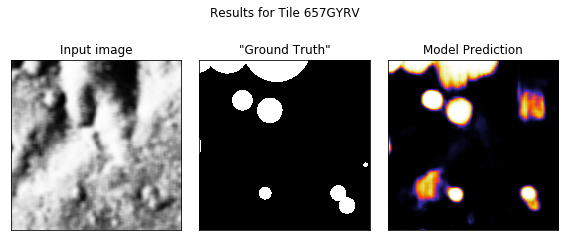

In [5]:
for file in files[14:21]:
    inspect_prediction_from_disc(file[:-4])

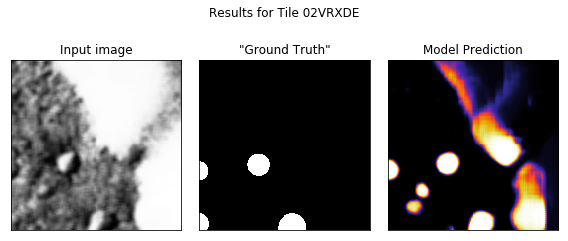

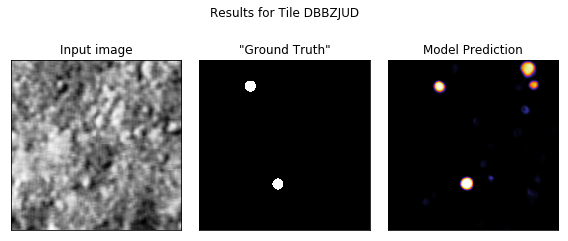

In [6]:
for file in files[21:]:
    inspect_prediction_from_disc(file[:-4])